# Pattern match
### Task: Сделайте self фото на некотором расстоянии от камеры с поднятой рукой. Сделайте crop вашей руки - это ваш шаблон. Исходное изображение - это матрица в которой вы будете искать шаблон.

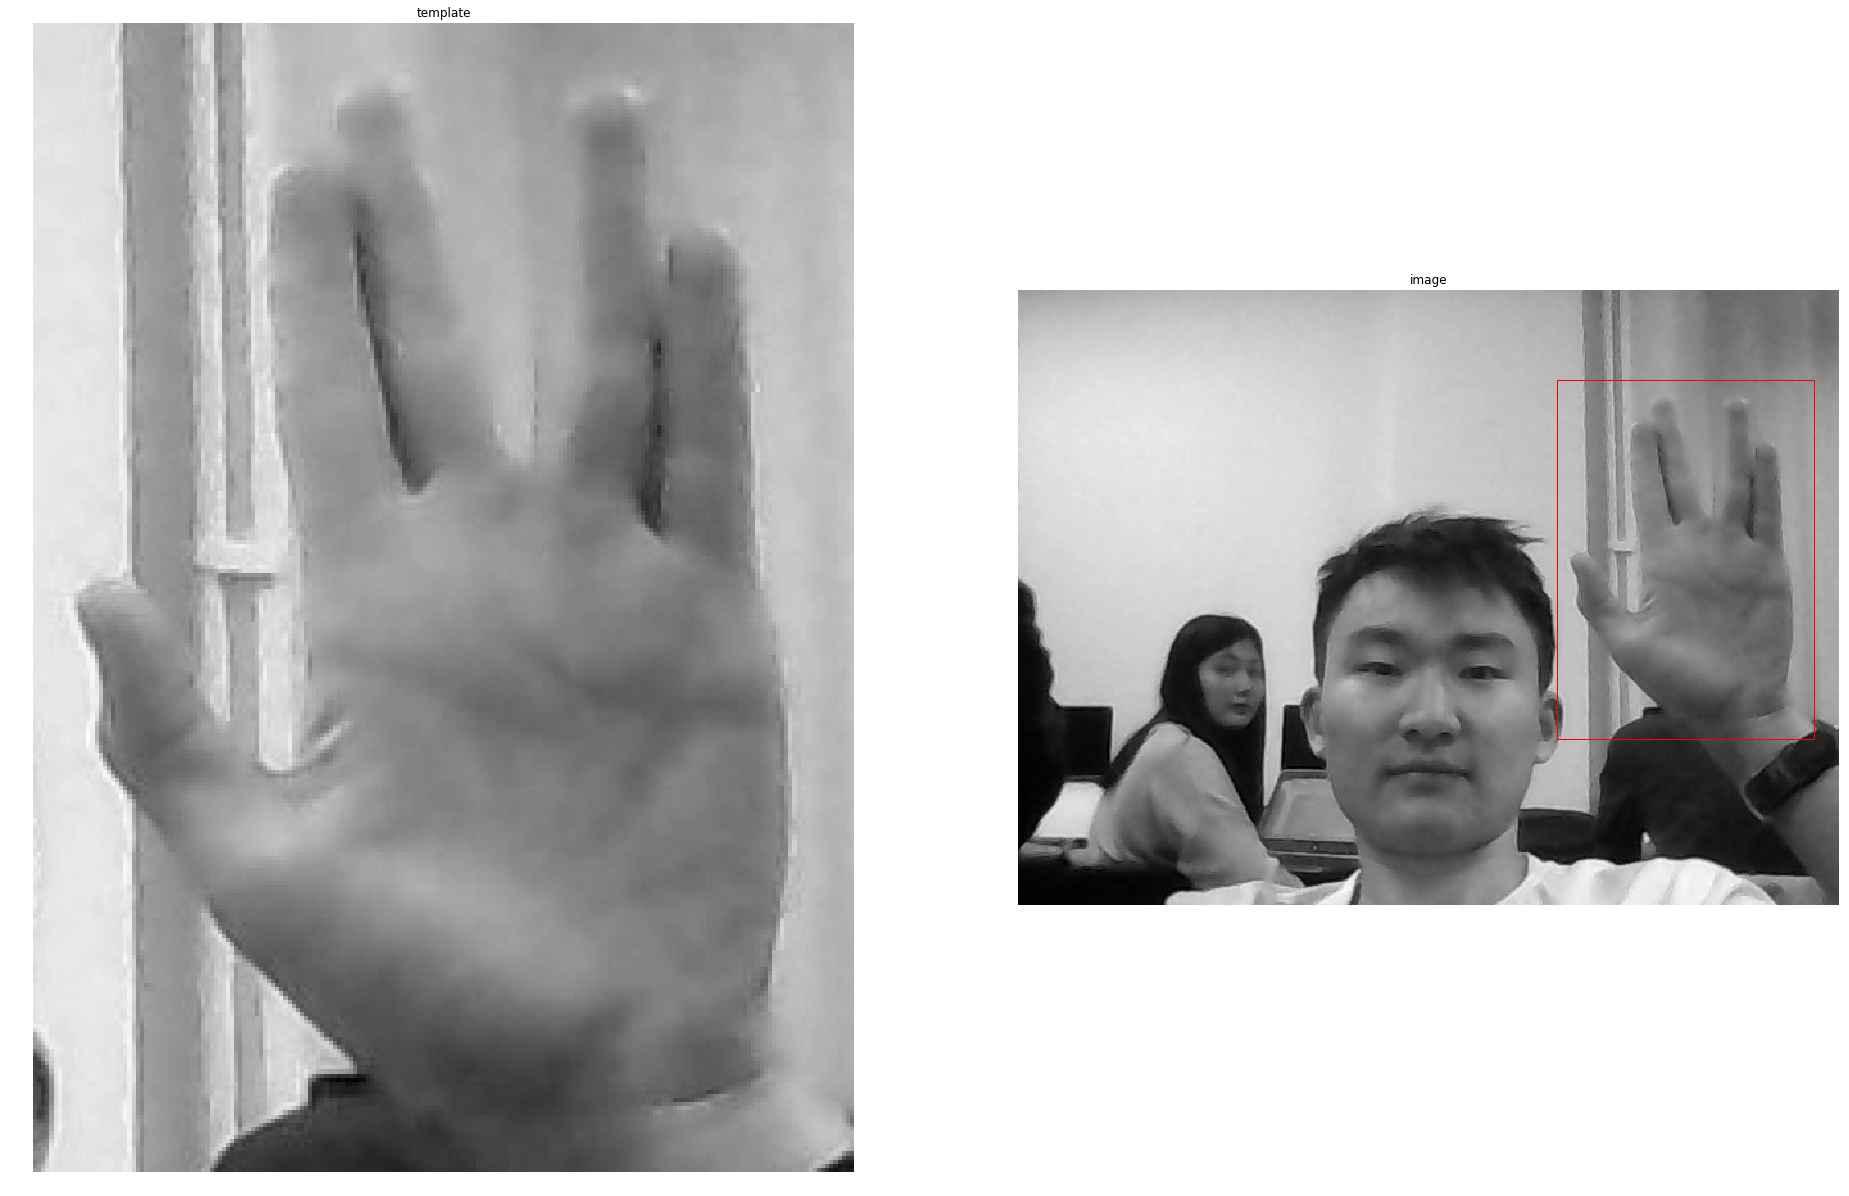

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import scipy.misc as simg

from skimage import data
from skimage.feature import match_template


image = simg.imread('./me.jpg', mode="F")
hand = image[70:350, 420:620]

result = match_template(image, hand)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(50, 60))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2, adjustable='box-forced')

ax1.imshow(hand, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
h, w = hand.shape
rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none')
ax2.add_patch(rect)


plt.show()